In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
data = pd.read_csv('data/ex2data1.txt',names = ['exam1','exam2','admit_status'])

In [74]:
data.head()

,exam1,exam2,admit_status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [75]:
data.describe()

,exam1,exam2,admit_status
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


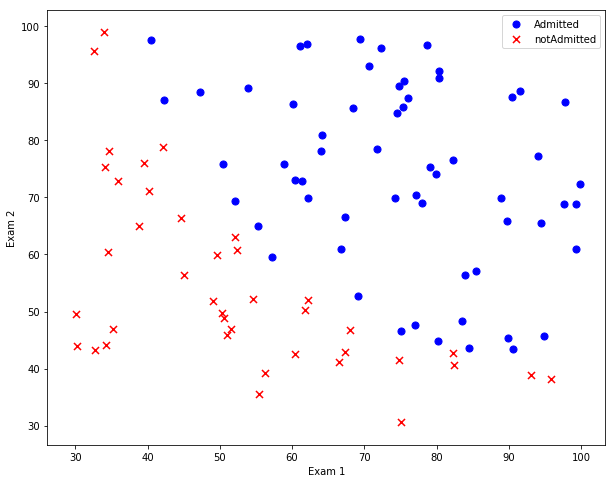

In [76]:
positive = data[data['admit_status'].isin([1])]
negative = data[data['admit_status'].isin([0])]

fig , ax = plt.subplots(figsize=(10,8))
ax.scatter(positive['exam1'],positive['exam2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['exam1'],negative['exam2'],s=50,c='r',marker='x',label='notAdmitted')

ax.legend()
ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')

In [77]:
sigmoid = lambda x: 1/(1+np.exp(-1*x))

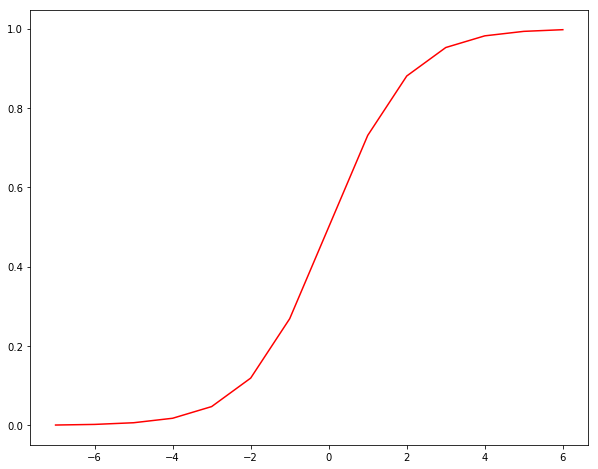

In [78]:
x_points = np.arange(-7,7,step=1)
fig , ax = plt.subplots(figsize=(10,8))
ax.plot(x_points,sigmoid(x_points),c='r')

In [79]:
data.insert(2,'ones',1)
cols = data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [80]:
X.head()

,exam1,exam2,ones
0,34.623660,78.024693,1
1,30.286711,43.894998,1
2,35.847409,72.902198,1
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [81]:
y.head()

,admit_status
0,0
1,0
2,0
3,1
4,1


In [82]:
X = np.array(X.values)
y = np.array(y.values)

In [83]:
theta = np.zeros(cols-1)

In [93]:
def cost(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    
    return np.sum(first-second)/len(X)

In [94]:
cost(theta,X,y)

0.69314718055994529

In [95]:
def gradient(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X*theta.T)-y
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term)/len(X)
        
    return grad

In [96]:
gradient(theta,X,y)

array([-12.00921659, -11.26284221,  -0.1       ])

In [97]:
X.shape,y.shape,theta.shape

((100L, 3L), (100L, 1L), (3L,))

In [99]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([  0.20623159,   0.20147149, -25.16131867]), 36, 0)

In [101]:
cost(result[0],X,y)

0.20349770158947444

In [103]:
def predict(theta,X):
    preds = sigmoid(X*theta.T)
    return [1 if x>0.5 else 0 for x in preds]

In [105]:
theta = np.matrix(result[0])
predictions = predict(theta,X)

In [107]:
correct = [1 if (a==1 and b==1) or (a==0 and b==0) else 0 for (a,b) in zip(predictions,y)]

In [118]:
accuracy = np.sum(correct)/(len(correct)*1.0) *100

In [120]:
accuracy

89.0

In [122]:
result[0]

array([  0.20623159,   0.20147149, -25.16131867])

In [124]:
a = result[0][0]
b = result[0][1]
c = result[0][2]

In [126]:
y_val = lambda X: (-b/a)*X-(c/b)

In [136]:
x_data = np.arange(20,100,step=1)
y_data = y_val(x_data)

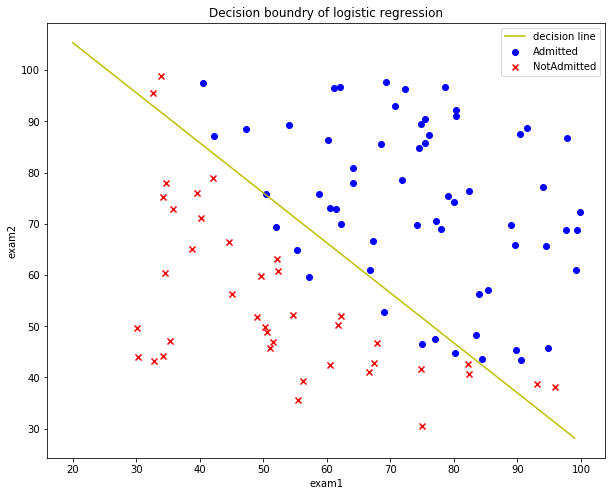

In [137]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(positive['exam1'],positive['exam2'],c = 'b',marker='o',label = 'Admitted')
ax.scatter(negative['exam1'],negative['exam2'],c = 'r',marker = 'x' ,label = 'NotAdmitted')
ax.plot(x_data,y_data,c = 'y',label = 'decision line')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
ax.set_title('Decision boundry of logistic regression')